# Info

- https://www.gov.br/produtividade-e-comercio-exterior/pt-br/assuntos/comercio-exterior/estatisticas/base-de-dados-bruta

- CO_ANO - Ano
- CO_MES - Mês
- CO_NCM - Código NCM - NCM (Nomenclatura Comum do Mercosul) código estabelecido para identificar as mercadorias e facilitar o comércio internacional.
- CO_UNID - código da unidade estatística 
- CO_PAIS - código de país de destino/origem do produto
- SG_UF_NCM - código da UF de origem/destino do produto
- CO_VIA - código da via de transporte
- CO_URF - código da URF de embarque/desembarque
- QT_ESTAT - quantidade estatística
- KG_LIQUIDO - quilograma líquido
- VL_FOB - valor dólar FOB (US$)

# 1.0 - Importing Libs and Loading Data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# custom libs
from libs.eda import *

In [3]:
data = pd.read_csv('data/EXP_2021.csv', sep=';')

data['CO_NCM'] = data['CO_NCM'].astype(str)

# 2.0 - Exploring Data

## 2.1 - Exports by Sate

In [63]:
columns = ['UF', "Count"]
export_sate = data['SG_UF_NCM'].value_counts().reset_index()
export_sate.columns = columns

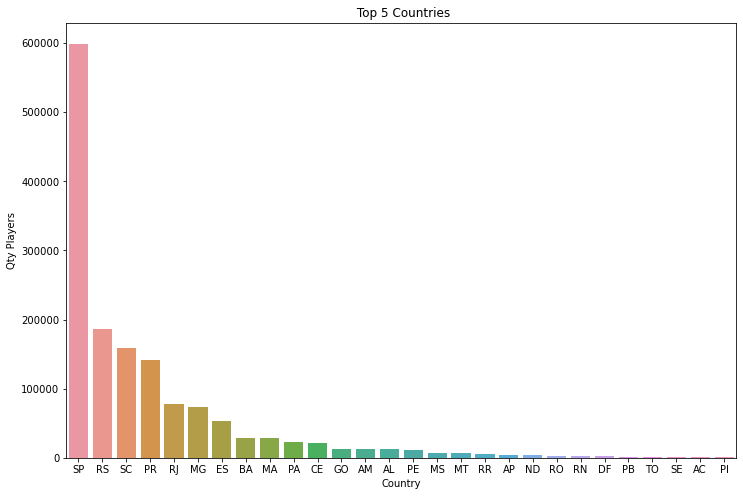

In [69]:
fig, ax = plt.subplots ( figsize = (12,8))

ax = sns.barplot(data = export_sate , x = "UF" , y = "Count" )
ax.set_title(f' Exports By Sate')
ax.set_xlabel('Country')
ax.set_ylabel('Qty Players')
plt.show()


In [4]:
data.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,2021,1,40169990,10,361,SP,1,817800,5353,5353,42235
1,2021,2,94035000,11,317,RS,1,1017700,487,49670,53961
2,2021,11,35051000,10,63,MG,7,1017500,144000,144000,99654
3,2021,4,61023000,11,249,SP,4,817600,14,5,1087
4,2021,2,82111000,11,63,RS,7,1017503,7708,1105,12488


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480295 entries, 0 to 1480294
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   CO_ANO      1480295 non-null  int64 
 1   CO_MES      1480295 non-null  int64 
 2   CO_NCM      1480295 non-null  object
 3   CO_UNID     1480295 non-null  int64 
 4   CO_PAIS     1480295 non-null  int64 
 5   SG_UF_NCM   1480295 non-null  object
 6   CO_VIA      1480295 non-null  int64 
 7   CO_URF      1480295 non-null  int64 
 8   QT_ESTAT    1480295 non-null  int64 
 9   KG_LIQUIDO  1480295 non-null  int64 
 10  VL_FOB      1480295 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 124.2+ MB


In [6]:
#checking for null values in our data
data.isnull().sum()

CO_ANO        0
CO_MES        0
CO_NCM        0
CO_UNID       0
CO_PAIS       0
SG_UF_NCM     0
CO_VIA        0
CO_URF        0
QT_ESTAT      0
KG_LIQUIDO    0
VL_FOB        0
dtype: int64

There are no values missing on this dataset

In [7]:
EDA_values(data)


  0 | CO_ANO     |  [2021]
  1 | CO_MES     |  [ 1  2 11  4  3  7 10  6  5  9  8 12]
  2 | CO_NCM     |  Min: 10011100 | Max: 97060000
  3 | CO_UNID    |  [10 11 17 13 16 21 15 12 19 20 22 14 18]
  4 | CO_PAIS    |  Min: 13 | Max: 890
  5 | SG_UF_NCM  |  Min: AC | Max: TO
  6 | CO_VIA     |  [ 1  7  4 12 15  0  9  6  2  8  3 13]
  7 | CO_URF     |  Min: 117600 | Max: 9999999
  8 | QT_ESTAT   |  Min: 0 | Max: 14300175000
  9 | KG_LIQUIDO |  Min: 0 | Max: 14300175000
 10 | VL_FOB     |  Min: 0 | Max: 2102966398


In [8]:
# Drop the CO_ANO as it has no use.
data.drop('CO_ANO', axis = 1, inplace = True)

In [10]:
co_mes = data.groupby(by = 'CO_MES')['QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB'].mean().reset_index()

/var/folders/0p/qrqq4ys102jbcx7c5bkmjnph0000gn/T/ipykernel_84283/3483038497.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  co_mes = data.groupby(by = 'CO_MES')['QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB'].mean().reset_index()


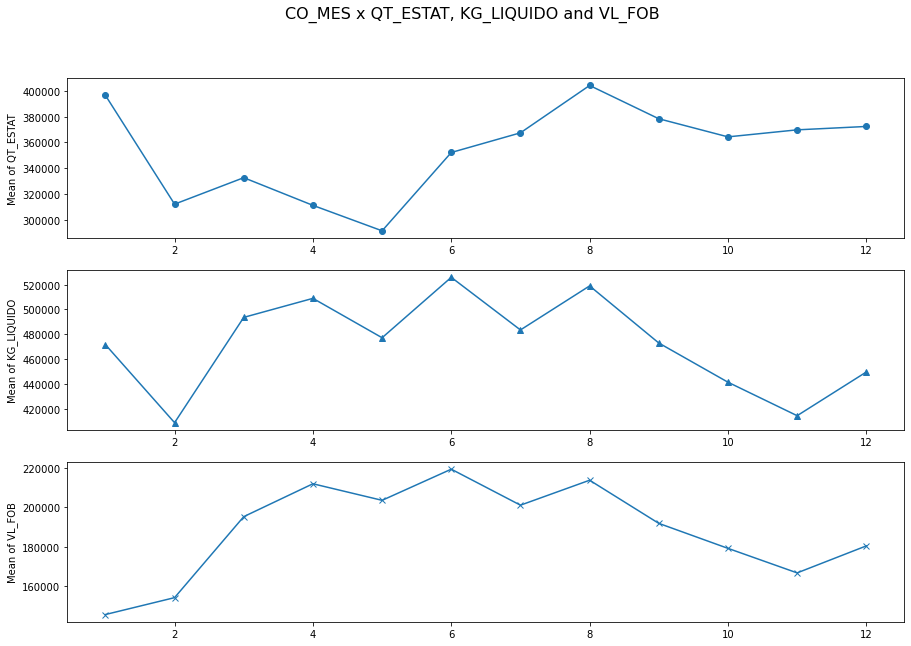

In [18]:
# creating multiples plots to compare with 
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(15,10))

ax[0].plot(co_mes['CO_MES'],
           co_mes['QT_ESTAT'],
           marker='o')
ax[0].set_ylabel('Mean of QT_ESTAT') 

ax[1].plot(co_mes['CO_MES'],
           co_mes['KG_LIQUIDO'],
           marker='^') 
ax[1].set_ylabel('Mean of KG_LIQUIDO') 

ax[2].plot(co_mes['CO_MES'],
           co_mes['VL_FOB'],
           marker='x') 
ax[2].set_ylabel('Mean of VL_FOB') 

fig.suptitle('CO_MES x QT_ESTAT, KG_LIQUIDO and VL_FOB', fontsize=16)

plt.show()

In [39]:
co_ncm = data.groupby(by = 'CO_NCM')['QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB'].mean().reset_index().sort_values(by= 'VL_FOB', ascending=False)[:25]

/var/folders/0p/qrqq4ys102jbcx7c5bkmjnph0000gn/T/ipykernel_84283/1057551805.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  co_ncm = data.groupby(by = 'CO_NCM')['QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB'].mean().reset_index().sort_values(by= 'VL_FOB', ascending=False)[:25]


/var/folders/0p/qrqq4ys102jbcx7c5bkmjnph0000gn/T/ipykernel_84283/1589204317.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[0].set_xticks([])
/var/folders/0p/qrqq4ys102jbcx7c5bkmjnph0000gn/T/ipykernel_84283/1589204317.py:14: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[1].set_xticks([])


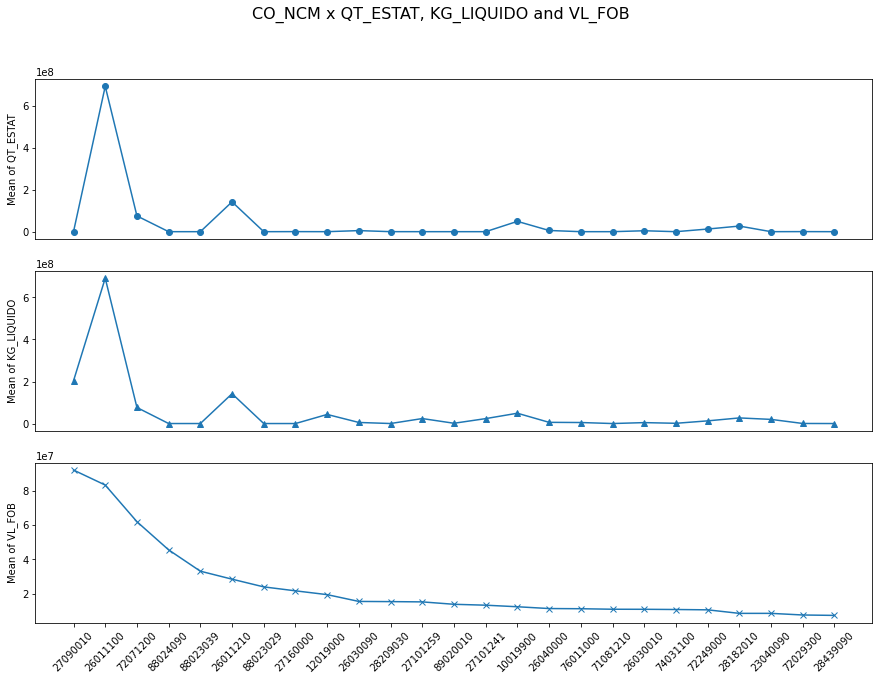

In [53]:
# creating multiples plots to compare with 
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(15,10))

ax[0].plot(co_ncm['CO_NCM'],
           co_ncm['QT_ESTAT'],
           marker='o')
ax[0].set_ylabel('Mean of QT_ESTAT') 
ax[0].set_xticks([])

ax[1].plot(co_ncm['CO_NCM'],
           co_ncm['KG_LIQUIDO'],
           marker='^') 
ax[1].set_ylabel('Mean of KG_LIQUIDO') 
ax[1].set_xticks([])

ax[2].plot(co_ncm['CO_NCM'],
           co_ncm['VL_FOB'],
           marker='x') 
ax[2].set_ylabel('Mean of VL_FOB') 

fig.suptitle('CO_NCM x QT_ESTAT, KG_LIQUIDO and VL_FOB', fontsize=16)
plt.xticks(rotation = 45)

plt.show()

In [54]:
data

,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,1,40169990,10,361,SP,1,817800,5353,5353,42235
1,2,94035000,11,317,RS,1,1017700,487,49670,53961
2,11,35051000,10,63,MG,7,1017500,144000,144000,99654
3,4,61023000,11,249,SP,4,817600,14,5,1087
4,2,82111000,11,63,RS,7,1017503,7708,1105,12488
...,...,...,...,...,...,...,...,...,...,...
1480290,8,27101999,10,845,RS,7,1010252,2448,2448,8426
1480291,3,68022900,15,791,MG,1,717600,230,23861,45072
1480292,4,85113020,11,586,SC,7,917501,20,2,27
1480293,6,38241000,10,169,SP,1,817800,18600,18600,47080


In [55]:
data.columns

Index(['CO_MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB'],
      dtype='object')

In [58]:
data['SG_UF_NCM'].value_counts()

SP    599074
RS    186417
SC    158485
PR    140944
RJ     77901
MG     72984
ES     52558
BA     29329
MA     28636
PA     23365
CE     21788
GO     12704
AM     12569
AL     12362
PE     11262
MS      6979
MT      6362
RR      5077
AP      4559
ND      3522
RO      2767
RN      2599
DF      2177
PB      1879
TO      1131
SE      1094
AC      1019
PI       752
Name: SG_UF_NCM, dtype: int64